In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [147]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [149]:
data.shape

(8693, 14)

# Train-Test Split

In [150]:
from sklearn.model_selection import train_test_split

data_copy = data.copy()
data = pd.get_dummies(data, dtype='int', columns=['HomePlanet', 'Destination'])
train_data, test_data = train_test_split(data, random_state=42, train_size=0.8)

print(train_data.shape)
print(test_data.shape)

(6954, 18)
(1739, 18)


In [151]:
train_data.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
2333,2513_01,False,NaN,28.0,False,0.0,55.0,0.0,656.0,0.0,Loree Mathison,False,1,0,0,0,0,1
2589,2774_02,False,F/575/P,17.0,False,0.0,1195.0,31.0,0.0,0.0,Crisey Mcbriddley,False,1,0,0,0,0,1
8302,8862_04,True,C/329/S,28.0,False,0.0,0.0,0.0,0.0,0.0,Alramix Myling,True,0,1,0,1,0,0
8177,8736_02,False,F/1800/P,20.0,False,NaN,2.0,289.0,976.0,0.0,Tros Pota,True,0,0,1,0,0,1
500,0539_02,True,C/18/P,36.0,False,0.0,0.0,0.0,0.0,0.0,Achyon Nalanet,True,0,1,0,1,0,0


# EDA

C:\Users\hi\AppData\Local\Temp\ipykernel_17468\2561385843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Transported', palette='plasma')


<Axes: xlabel='Transported', ylabel='count'>

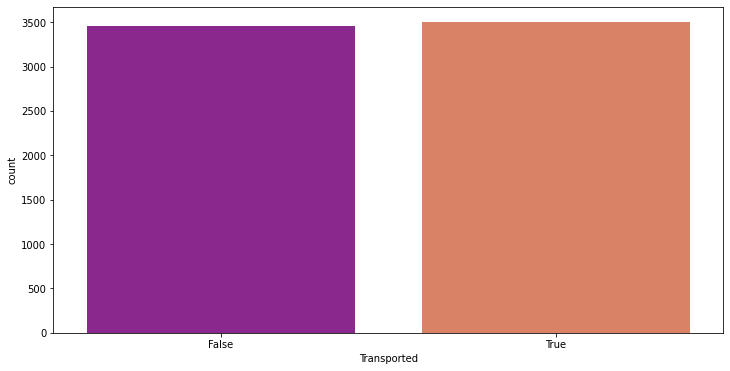

In [152]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Transported', palette='plasma')

<Axes: ylabel='RoomService'>

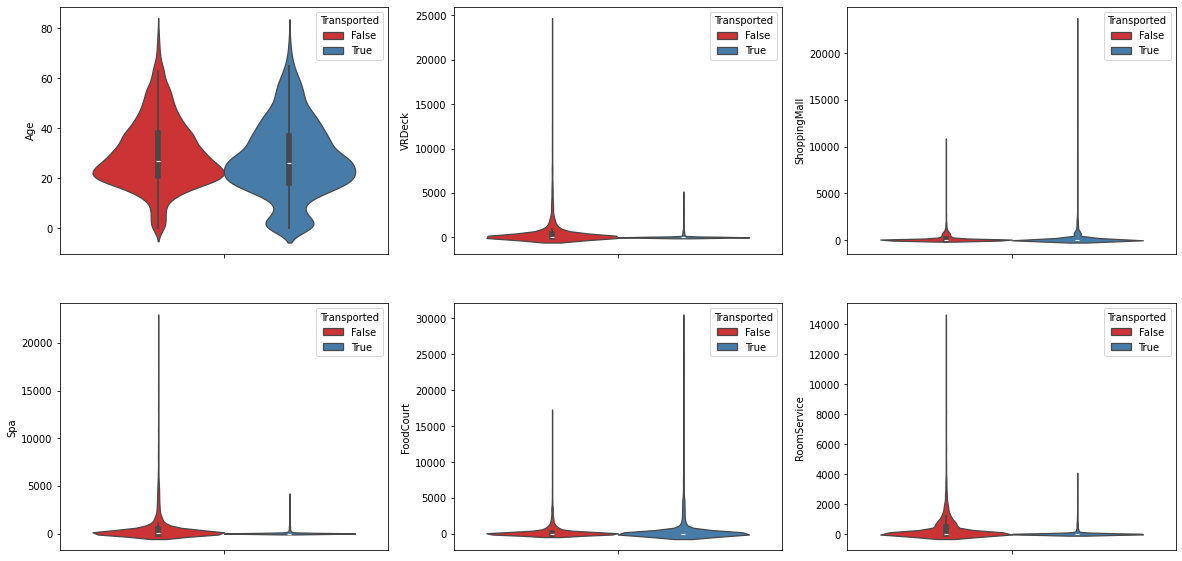

In [153]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.violinplot(y='Age', hue='Transported', data=data_copy, palette='Set1', ax=axs[0][0])
sns.violinplot(y='VRDeck', hue='Transported', data=data_copy, palette='Set1', ax=axs[0][1])
sns.violinplot(y='Spa', hue='Transported', data=data_copy, palette='Set1', ax=axs[1][0])
sns.violinplot(y='FoodCourt', hue='Transported', data=data_copy, palette='Set1', ax=axs[1][1])
sns.violinplot(y='ShoppingMall', hue='Transported', data=data_copy, palette='Set1', ax=axs[0][2])
sns.violinplot(y='RoomService', hue='Transported', data=data_copy, palette='Set1', ax=axs[1][2])

In [154]:
contingency_table_VT = pd.crosstab(data_copy['VIP'], data_copy['Transported'])
print(contingency_table_VT)

Transported  False  True 
VIP                      
False         4093   4198
True           123     76


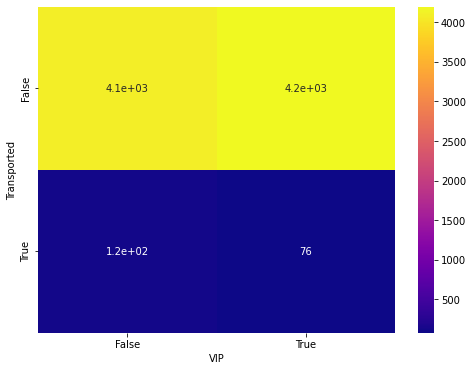

In [155]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_VT, annot=True, cmap='plasma')
plt.xlabel('VIP')
plt.ylabel('Transported')
plt.show()

In [156]:
contingency_table_CT = pd.crosstab(data_copy['CryoSleep'], data_copy['Transported'])
print(contingency_table_CT)

Transported  False  True 
CryoSleep                
False         3650   1789
True           554   2483


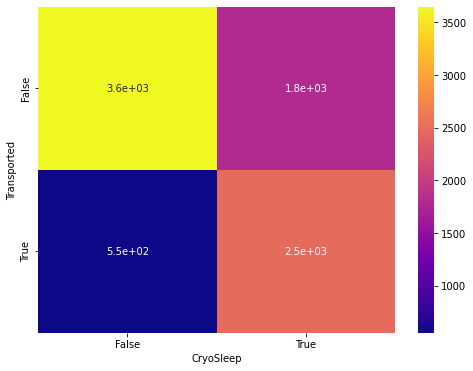

In [157]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_CT, annot=True, cmap='plasma')
plt.xlabel('CryoSleep')
plt.ylabel('Transported')
plt.show()

In [158]:
contingency_table_HT = pd.crosstab(data_copy['HomePlanet'], data_copy['Transported'])
print(contingency_table_HT)

Transported  False  True 
HomePlanet               
Earth         2651   1951
Europa         727   1404
Mars           839    920


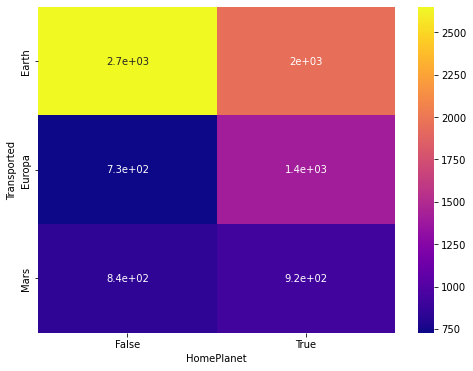

In [159]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_HT, annot=True, cmap='plasma')
plt.xlabel('HomePlanet')
plt.ylabel('Transported')
plt.show()

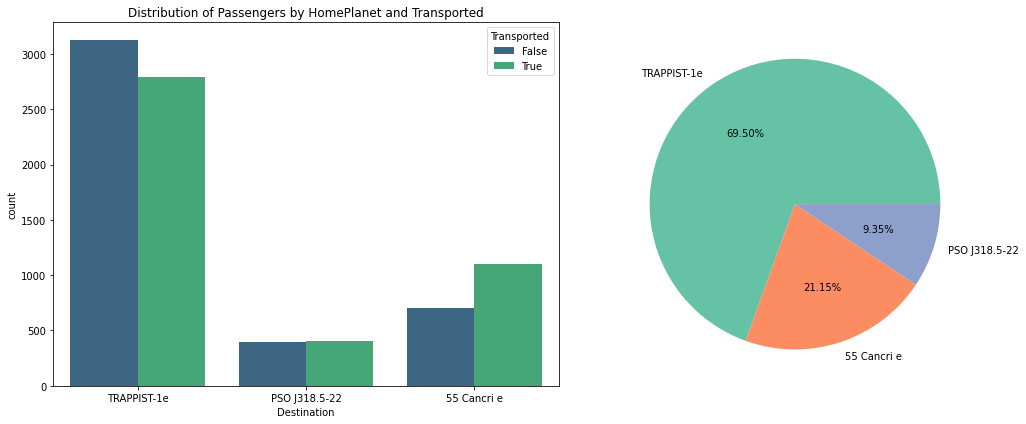

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='Destination', hue='Transported', data=data_copy, palette='viridis', ax=axes[0]).set_title('Distribution of Passengers by HomePlanet and Transported')
plt.pie(data_copy['Destination'].value_counts(), labels=data_copy['Destination'].value_counts().index, autopct='%.2f%%', colors=sns.color_palette('Set2'))
plt.tight_layout()
plt.show()

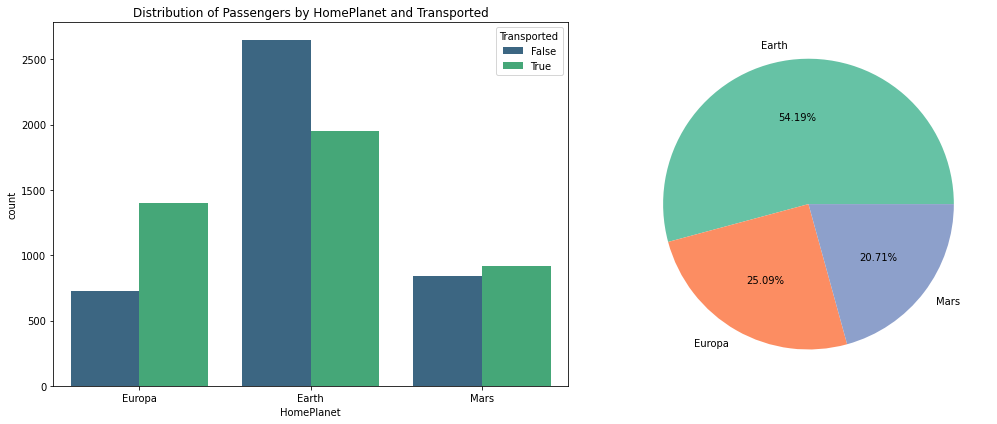

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='HomePlanet', hue='Transported', data=data_copy, palette='viridis', ax=axes[0]).set_title('Distribution of Passengers by HomePlanet and Transported')
plt.pie(data_copy['HomePlanet'].value_counts(), labels=data_copy['HomePlanet'].value_counts().index, autopct='%.2f%%', colors=sns.color_palette('Set2'))
plt.tight_layout()
plt.show()

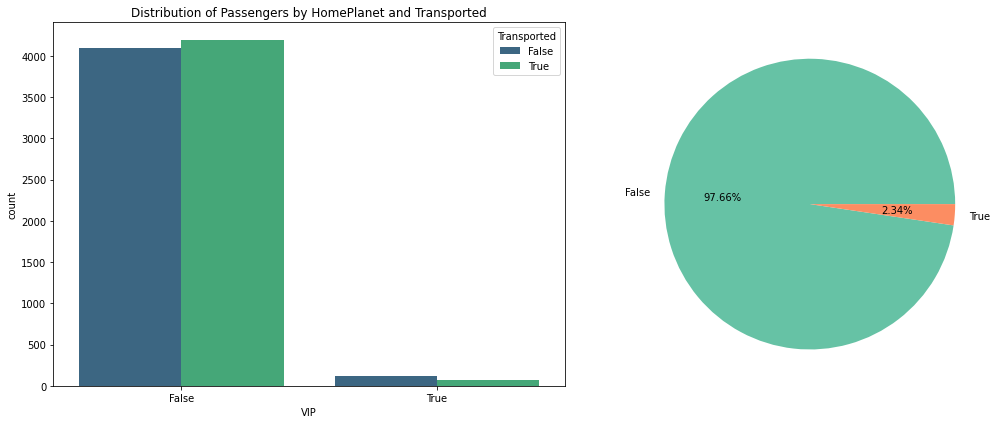

In [162]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='VIP', hue='Transported', data=data_copy, palette='viridis', ax=axes[0]).set_title('Distribution of Passengers by HomePlanet and Transported')
plt.pie(data_copy['VIP'].value_counts(), labels=data_copy['VIP'].value_counts().index, autopct='%.2f%%', colors=sns.color_palette('Set2'))
plt.tight_layout()
plt.show()

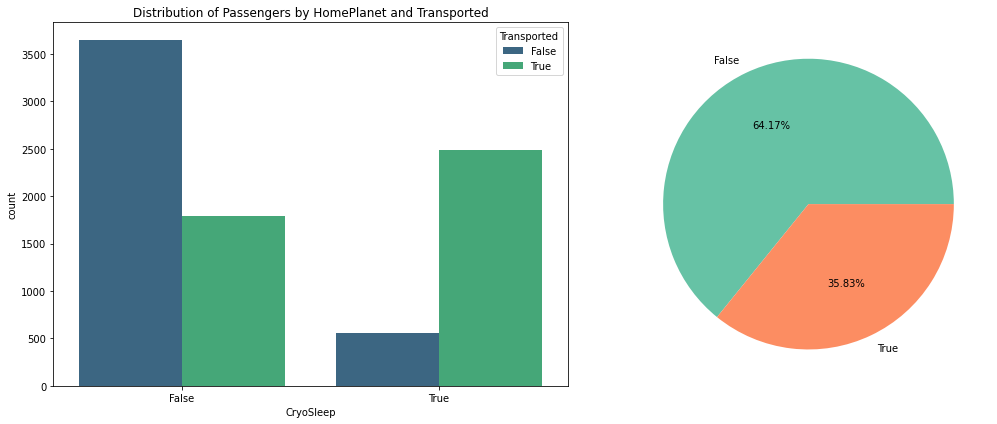

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='CryoSleep', hue='Transported', data=data_copy, palette='viridis', ax=axes[0]).set_title('Distribution of Passengers by HomePlanet and Transported')
plt.pie(data_copy['CryoSleep'].value_counts(), labels=data_copy['CryoSleep'].value_counts().index, autopct='%.2f%%', colors=sns.color_palette('Set2'))
plt.tight_layout()
plt.show()

# PreProcessing 
### 1) dropping PassengerId and Name column

In [164]:
test_data = test_data.drop(columns=['PassengerId', 'Name'])
train_data = train_data.drop(columns=['PassengerId', 'Name'])
train_data.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
2333,False,NaN,28.0,False,0.0,55.0,0.0,656.0,0.0,False,1,0,0,0,0,1
2589,False,F/575/P,17.0,False,0.0,1195.0,31.0,0.0,0.0,False,1,0,0,0,0,1
8302,True,C/329/S,28.0,False,0.0,0.0,0.0,0.0,0.0,True,0,1,0,1,0,0
8177,False,F/1800/P,20.0,False,NaN,2.0,289.0,976.0,0.0,True,0,0,1,0,0,1
500,True,C/18/P,36.0,False,0.0,0.0,0.0,0.0,0.0,True,0,1,0,1,0,0


### 2) Imputing Missing values

In [165]:
train_data.isnull().sum()

CryoSleep                    177
Cabin                        158
Age                          148
VIP                          162
RoomService                  126
FoodCourt                    140
ShoppingMall                 165
Spa                          134
VRDeck                       151
Transported                    0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
dtype: int64

In [166]:
test_numeric_data = test_data.select_dtypes(['float', 'int'])
train_numeric_data = train_data.select_dtypes(['float', 'int'])
train_numeric_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
2333,28.0,0.0,55.0,0.0,656.0,0.0,1,0,0,0,0,1
2589,17.0,0.0,1195.0,31.0,0.0,0.0,1,0,0,0,0,1
8302,28.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
8177,20.0,NaN,2.0,289.0,976.0,0.0,0,0,1,0,0,1
500,36.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0


In [167]:
test_str_data = test_data.select_dtypes(['object', 'bool'])
train_str_data = train_data.select_dtypes(['object', 'bool'])
train_str_data.head()

,CryoSleep,Cabin,VIP,Transported
2333,False,NaN,False,False
2589,False,F/575/P,False,False
8302,True,C/329/S,False,True
8177,False,F/1800/P,False,True
500,True,C/18/P,False,True


In [168]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')
mod_imputer = SimpleImputer(strategy='most_frequent')

train_numeric_data = pd.DataFrame(median_imputer.fit_transform(train_numeric_data), columns=train_numeric_data.columns, index=train_numeric_data.index)
train_str_data = pd.DataFrame(mod_imputer.fit_transform(train_str_data), columns=train_str_data.columns, index=train_str_data.index)

test_numeric_data = pd.DataFrame(median_imputer.transform(test_numeric_data), columns=test_numeric_data.columns, index=test_numeric_data.index)
test_str_data = pd.DataFrame(mod_imputer.transform(test_str_data), columns=test_str_data.columns, index=test_str_data.index)

print(train_numeric_data.head())
print(train_str_data.head())

       Age  RoomService  FoodCourt  ShoppingMall    Spa  VRDeck  \
2333  28.0          0.0       55.0           0.0  656.0     0.0   
2589  17.0          0.0     1195.0          31.0    0.0     0.0   
8302  28.0          0.0        0.0           0.0    0.0     0.0   
8177  20.0          0.0        2.0         289.0  976.0     0.0   
500   36.0          0.0        0.0           0.0    0.0     0.0   

      HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
2333               1.0                0.0              0.0   
2589               1.0                0.0              0.0   
8302               0.0                1.0              0.0   
8177               0.0                0.0              1.0   
500                0.0                1.0              0.0   

      Destination_55 Cancri e  Destination_PSO J318.5-22  \
2333                      0.0                        0.0   
2589                      0.0                        0.0   
8302                      1.0               

In [169]:
train_data = pd.concat([train_numeric_data, train_str_data], axis=1)
test_data = pd.concat([test_numeric_data, test_str_data], axis=1)
train_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Cabin,VIP,Transported
2333,28.0,0.0,55.0,0.0,656.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,False,B/82/S,False,False
2589,17.0,0.0,1195.0,31.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,False,F/575/P,False,False
8302,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,True,C/329/S,False,True
8177,20.0,0.0,2.0,289.0,976.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False,F/1800/P,False,True
500,36.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,True,C/18/P,False,True


In [170]:
test_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Cabin,VIP,Transported
304,19.0,417.0,349.0,634.0,3.0,1057.0,0.0,0.0,1.0,0.0,0.0,1.0,False,F/63/S,False,True
2697,18.0,4.0,904.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,False,G/460/S,False,False
8424,41.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,True,G/1449/S,False,False
1672,35.0,0.0,338.0,436.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,False,G/291/P,False,True
8458,43.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,True,D/288/P,False,True


In [171]:
train_data.isnull().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
CryoSleep                    0
Cabin                        0
VIP                          0
Transported                  0
dtype: int64

# Encoding categorical data

In [172]:
test_data['CryoSleep'] = test_data['CryoSleep'].astype('int')
test_data['VIP'] = test_data['VIP'].astype('int')

train_data['CryoSleep'] = train_data['CryoSleep'].astype('int')
train_data['VIP'] = train_data['VIP'].astype('int')

test_data['Transported'] = test_data['Transported'].astype('int')
test_data['VIP'] = test_data['VIP'].astype('int')

train_data['Transported'] = train_data['Transported'].astype('int')
train_data['VIP'] = train_data['VIP'].astype('int')
train_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Cabin,VIP,Transported
2333,28.0,0.0,55.0,0.0,656.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,B/82/S,0,0
2589,17.0,0.0,1195.0,31.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,F/575/P,0,0
8302,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,C/329/S,0,1
8177,20.0,0.0,2.0,289.0,976.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,F/1800/P,0,1
500,36.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,C/18/P,0,1


In [173]:
from category_encoders.count import CountEncoder

co_encoder = CountEncoder()

cabin_train = train_data['Cabin']
train_data.drop(columns=['Cabin'], inplace=True)
cabin_train = pd.DataFrame(co_encoder.fit_transform(cabin_train), columns=['Cabin'], index=cabin_train.index)
train_data = pd.concat([train_data, cabin_train], axis=1)

cabin_test = test_data['Cabin']
test_data.drop(columns=['Cabin'], inplace=True)
cabin_test = pd.DataFrame(co_encoder.transform(cabin_test), columns=['Cabin'], index=cabin_test.index)
test_data = pd.concat([test_data, cabin_test], axis=1)
train_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,VIP,Transported,Cabin
2333,28.0,0.0,55.0,0.0,656.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,165
2589,17.0,0.0,1195.0,31.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,2
8302,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,1,5
8177,20.0,0.0,2.0,289.0,976.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1,2
500,36.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,1,4


In [174]:
test_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,VIP,Transported,Cabin
304,19.0,417.0,349.0,634.0,3.0,1057.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1,2.0
2697,18.0,4.0,904.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0.0
8424,41.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0.0
1672,35.0,0.0,338.0,436.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0.0
8458,43.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,1,4.0


# Dropping duplicate rows and outliers

In [175]:
def z_score_outlier(data):
    drop_outliers = np.array([])
    for column in data.columns:
        if (not data[column].dtype == 'object'):
            upper_bound = data[column].mean() + 3 * data[column].std()
            lower_bound = data[column].mean() - 3 * data[column].std()
            data = data.loc[(data[column] < upper_bound) & (data[column] > lower_bound)]

    return data

In [176]:
train_data = z_score_outlier(train_data)
train_data.shape

(5466, 16)

In [177]:
train_data = train_data.drop_duplicates()
train_data.shape

(4289, 16)

In [178]:
train_y = train_data.iloc[:, 14].to_numpy()
train_x = train_data.drop(columns=['Transported'])

test_y = test_data.iloc[:, 14].to_numpy()
test_x = test_data.drop(columns=['Transported'])

# Normalization

In [179]:
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()

train_x = pd.DataFrame(st_scaler.fit_transform(train_x), columns=train_x.columns, index=train_x.index)
test_x = pd.DataFrame(st_scaler.transform(test_x), columns=test_x.columns, index=test_x.index)

In [180]:
train_x

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,VIP,Cabin
2589,-0.861682,-0.493309,1.104046,-0.364379,-0.417216,-0.412115,0.847961,-0.477004,-0.502622,-0.512067,0.0,0.557511,-0.535203,0.0,0.296752
8302,-0.093900,-0.493309,-0.392838,-0.456369,-0.417216,-0.412115,-1.179299,2.096418,-0.502622,1.952868,0.0,-1.793685,1.868448,0.0,2.810451
8177,-0.652287,-0.493309,-0.390332,0.401212,1.654913,-0.412115,-1.179299,-0.477004,1.989568,-0.512067,0.0,0.557511,-0.535203,0.0,0.296752
500,0.464487,-0.493309,-0.392838,-0.456369,-0.417216,-0.412115,-1.179299,2.096418,-0.502622,1.952868,0.0,-1.793685,1.868448,0.0,1.972551
7203,0.534286,1.911940,-0.392838,-0.218976,-0.332293,-0.412115,-1.179299,-0.477004,1.989568,-0.512067,0.0,0.557511,-0.535203,0.0,-0.541148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.045697,1.474184,-0.337722,-0.450434,5.858617,4.789677,-1.179299,2.096418,-0.502622,1.952868,0.0,-1.793685,-0.535203,0.0,-0.541148
6265,-0.233497,-0.493309,-0.392838,-0.456369,-0.417216,-0.412115,-1.179299,2.096418,-0.502622,-0.512067,0.0,0.557511,-0.535203,0.0,-0.541148
5734,-0.791884,-0.459636,-0.390332,-0.029062,0.877864,-0.412115,0.847961,-0.477004,-0.502622,-0.512067,0.0,0.557511,-0.535203,0.0,-0.541148
5191,1.441665,1.166312,-0.392838,-0.367346,1.200573,0.551263,-1.179299,-0.477004,1.989568,-0.512067,0.0,0.557511,-0.535203,0.0,-0.541148


# Feature Selection

In [181]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector

LDA = LinearDiscriminantAnalysis(solver='lsqr')
forward_selector = SequentialFeatureSelector(estimator=LDA, n_features_to_select=10)
forward_selector.fit(train_x, train_y)

SequentialFeatureSelector(estimator=LinearDiscriminantAnalysis(solver='lsqr'),
                          n_features_to_select=10)

In [182]:
forward_selector.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True, False,  True,  True, False])

In [183]:
train_x_selected = forward_selector.transform(train_x)
test_x_selected = forward_selector.transform(test_x)

# Model Training

In [184]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, auc

def model_train_test_evaluating(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred) 

    cm = confusion_matrix(y_train, y_train_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    fpr, tpr, thresholds = roc_curve(train_y, y_train_pred)
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.set_title('Confusion Matrix')
    disp.plot(ax=ax1)
    ax2.set_title('ROC Curve')
    roc_display.plot(ax=ax2)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    
    print('test_data report:')
    print('Acuuracy: ', end='')
    print(train_accuracy)
    print('F1_score: ', end='')
    print(f1_train)

    print('test_data report:')
    print('Acuuracy: ', end='')
    print(test_accuracy)
    print('F1_score: ', end='')
    print(f1_test)

In [186]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
scores = cross_validate(svm_linear, train_x, train_y, scoring=['f1', 'accuracy'])

In [187]:
scores.keys()

dict_keys(['fit_time', 'score_time', 'test_f1', 'test_accuracy'])

In [190]:
print("mean f1_score: ", end='')
print(scores['test_f1'].mean())
print("mean accuracy: ", end='')
print(scores['test_accuracy'].mean())

mean f1_score: 0.7241723411267584
mean accuracy: 0.7673132002186844


In [191]:
svm_linear.fit(train_x, train_y)

SVC(kernel='linear')

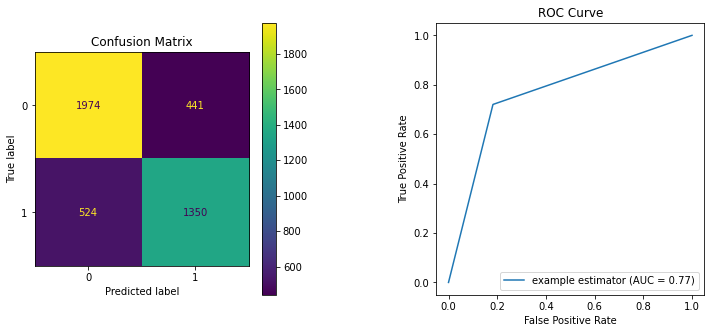

test_data report:
Acuuracy: 0.7750058288645372
F1_score: 0.7366984993178718
test_data report:
Acuuracy: 0.7665324899367453
F1_score: 0.7724215246636771


In [192]:
model_train_test_evaluating(train_x, train_y, test_x, test_y, svm_linear)